# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab

df = pd.read_csv('data/human_body_temperature.csv')

%matplotlib inline

## 1. Is the distribution of body temperatures normal?

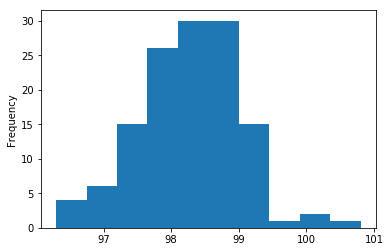

In [91]:
# Your work here.
N = len(df)
temp = df.temperature
temp.plot.hist()

Test for normality:
chi-sq test stat, p-value: (0.9865770936012268, 0.233174666762352)


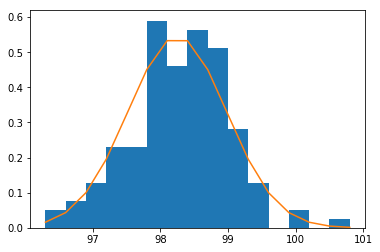

In [36]:
n, bins, patches = plt.hist(temp, 15, normed=1)
mu, sigma = temp.mean(), temp.std()
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
print('Test for normality:')
print('chi-sq test stat, p-value: ' + str(stats.shapiro(df.temperature)))

Distribution of body temperatures appears to be normal based on:
* Normal curve fits sample distribution well
* p-value in test for normality is .23 > .05, therefore unlikely to be a distribution other than normal.

## 2. Is the sample size large? Are the observations independent?

* The sample size is sufficiently large
* The observations are independent

## 3. Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t or z statistic?
Now try using the other test. How is the result be different? Why?

* Use a one-sample test for this since you are only looking at one sample
* Use the t statistic since population standard deviation is not known

In [46]:
import statsmodels

print('t-test results: ' + str(stats.ttest_1samp(temp, 98.6)))
print('z-test results: ' + str(statsmodels.stats.weightstats.ztest(temp, value=98.6)))

t-test results: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
z-test results: (-5.4548232923645195, 4.9021570141012155e-08)


The results of the t-test and z-test are very similar due to the large sample size.
Based on these results we can conclude that there we are very confident that <b>98.6 degrees is not the true population mean</b>.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

First compute confidence interval and margin of error for test stat:

In [75]:
import math
CI = stats.norm.interval(0.95, loc=mu, scale=sigma/math.sqrt(N))
print('Confidence Interval (95%): ' + str(CI))
print('Margin of Error: ' + str(abs(CI[0] - CI[1])/2/mu*100) + '%')

Confidence Interval (95%): (98.123196428181657, 98.375265110279898)
Margin of Error: 0.128280231878%


Use sample distribution to infer typical population values:

In [86]:
low, high = stats.norm.interval(0.95, loc=mu, scale=sigma)
print('abnormal temperature values are below ' + str(low) + ' or above ' + str(high) + '.')

abnormal temperature values are below 96.8122181854 or above 99.6862433531.


Note: I used 95% confidence interval to determine normal value range. A t-test could also be used by individuals to check if their temperature is abnormal.

## 5. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

* Use 2 sample t-test to compare means (test-statistic)

In [94]:
temp_male = df[df.gender == 'M'].temperature
temp_female = df[df.gender == 'F'].temperature
stats.ttest_ind(temp_male, temp_female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

yes, we can conclude that we are highly confident <b> there is a significant difference between male </b> and female normal temperature.

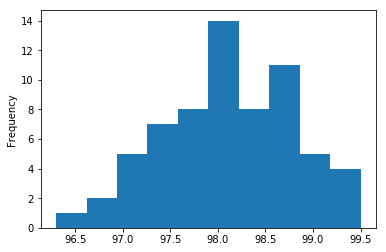

In [95]:
temp_male.plot.hist()

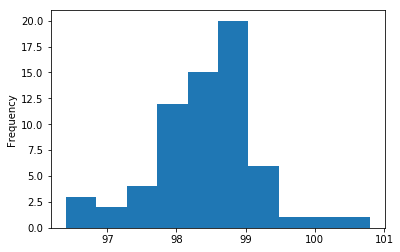

In [96]:
temp_female.plot.hist()